In [6]:
import matplotlib.pyplot as plt
def plot_behaviers(file_name):
    # plot actions
    file=open(file_name,"r")
    actions=[]
    for line in file.readlines():
        action=line.split(",")
        for a in action:
            actions.append(a)
    lst=[]
    for a in actions:
        b=a.strip('[').strip(']').split(" ")
        lst.append(b)
    action_values=[]
    for l in lst:
        for s in l:
            if (s!='0.' and s!=""):
                    if s!=']':
                        s=s.rstrip("]")
                        action_values.append(float(s))  
    return action_values

In [7]:
def plot_rewards(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    Rewards=[]
    for r in R:
        if r!='':
            Rewards.append(float(r))
    plt.figure(figsize=(20,8))
    plt.plot(Rewards)

In [8]:
def plot_vel(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    vels=[]
    for r in R:
        if r!='':
            vels.append(float(r))
    return(vels)
    

#### 奖励函数
每次更新，考虑瞬时速度，state向量加一个维度 velocity  
当达到目标高度时，检查是否速度是否=0.0，给额外正奖励（固定常数10）
#### DDPG模型  
* <div style="color:red"> states取5维  [z,ox,oy,oz,vel]</div>
* soft update 参数 0.001
* gamma 0.99
* Memory   按优先级存储/取样
   * 容量 1000
   * 一次取样量 100
   
* Actor  
   * 优化器 Adam: lr=0.0001  
   * 网络结构 2 hidden-layers(400-300)
   * 激活函数 relu
   * 批归一化
* Critic
   * 优化器 Adadelta(默认)
   * l2正则化(10-5)
   * 网络结构 state:（400-300）+ actions:300

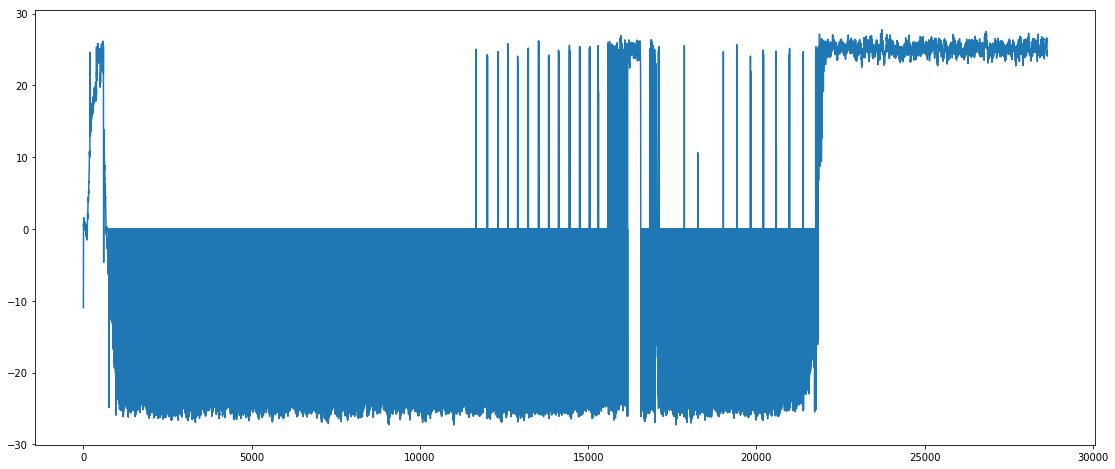

In [3]:
action_values=plot_behaviers("actions_01.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

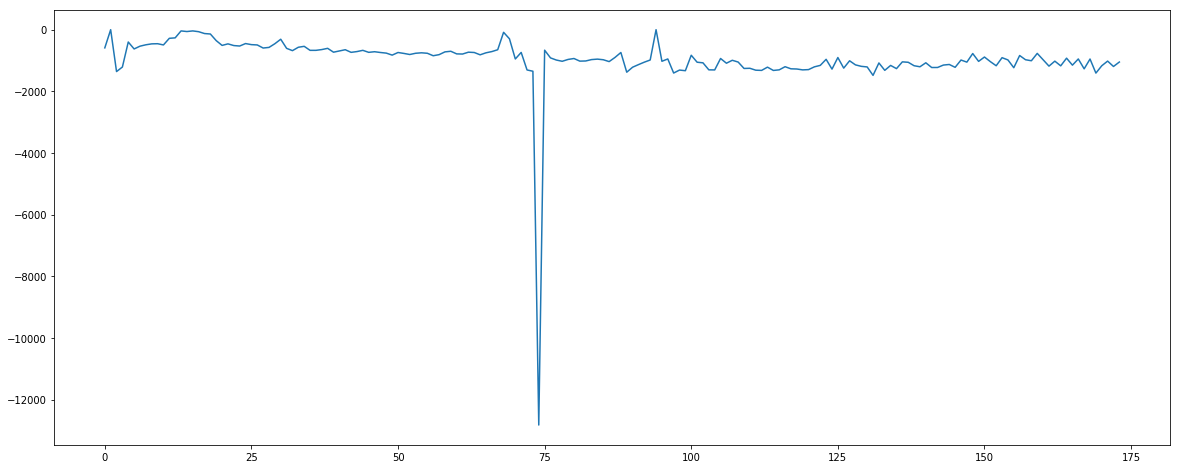

In [4]:
plot_rewards("rewards_01.txt")

* Actor每个hidden layer后面加一个Dropout（0.2）

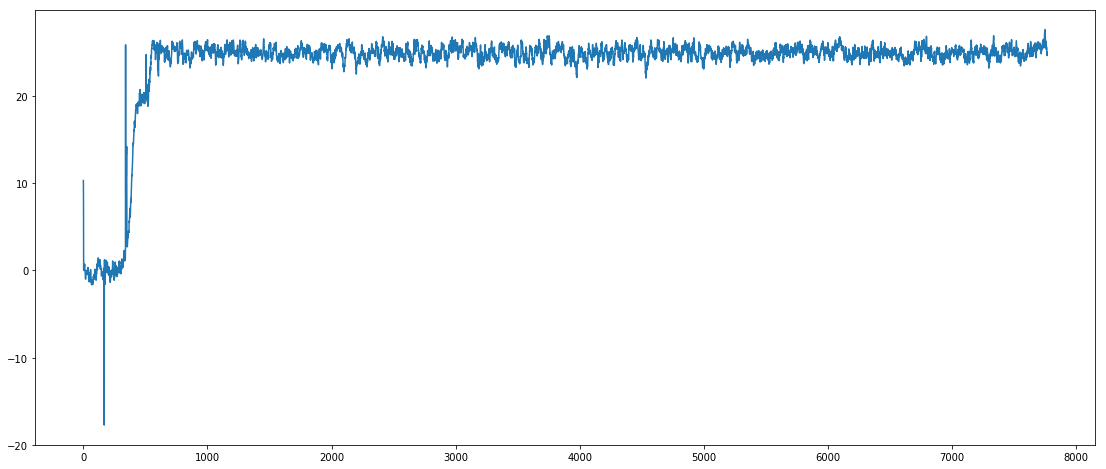

In [5]:
action_values=plot_behaviers("actions_02.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

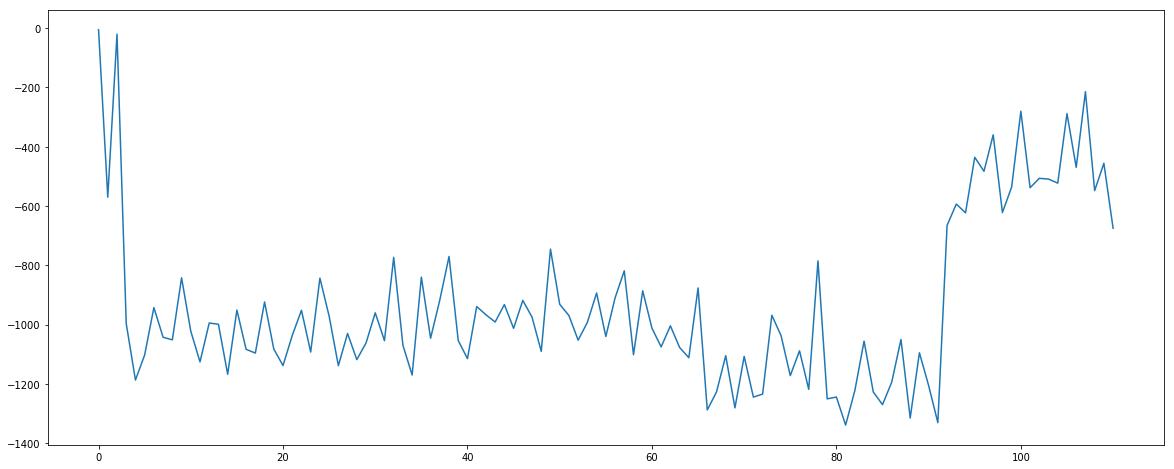

In [6]:
plot_rewards("rewards_02.txt")

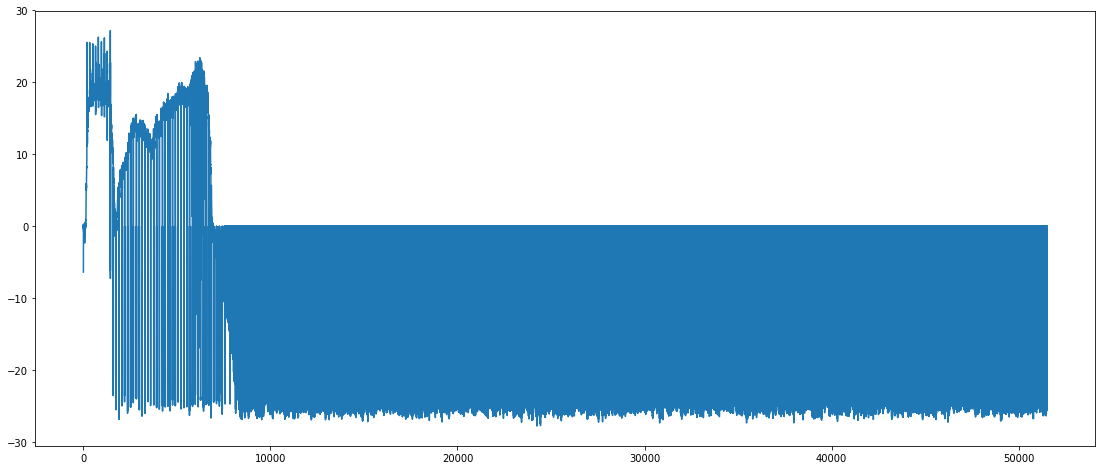

In [9]:
action_values=plot_behaviers("actions_03.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

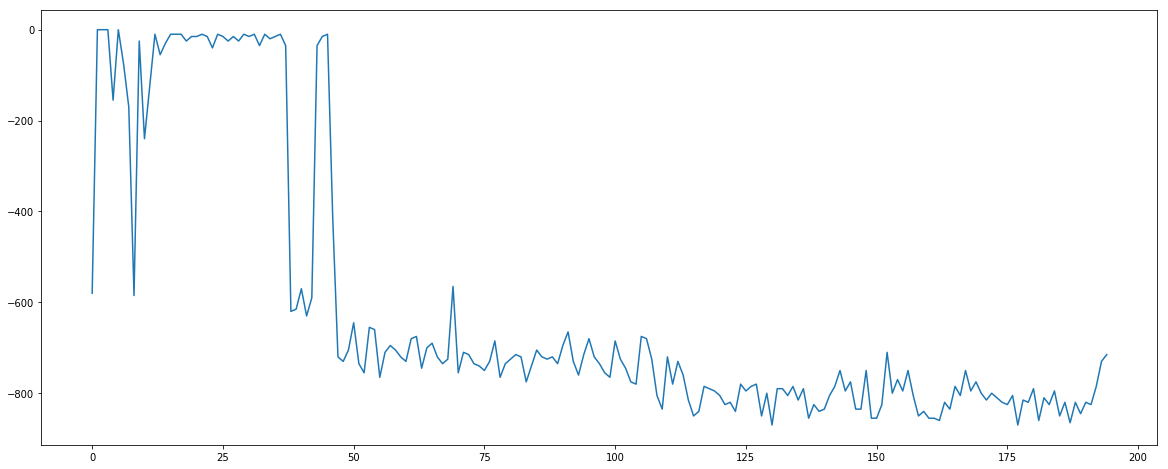

In [10]:
plot_rewards("rewards_03.txt")

* 去掉第二层 Dropout

(-200, 20000)

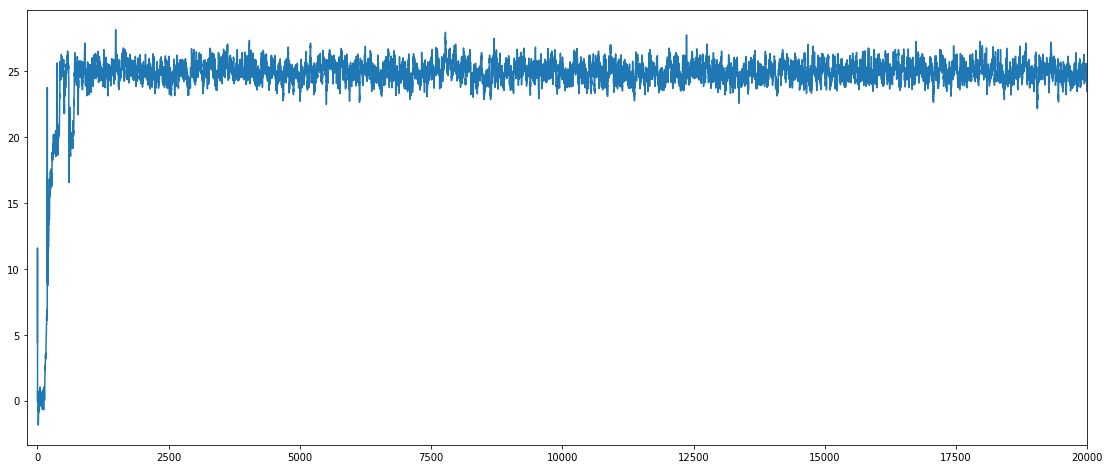

In [22]:
action_values=plot_behaviers("actions_04.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)
plt.xlim(left=-200,right=20000)

(0, 100)

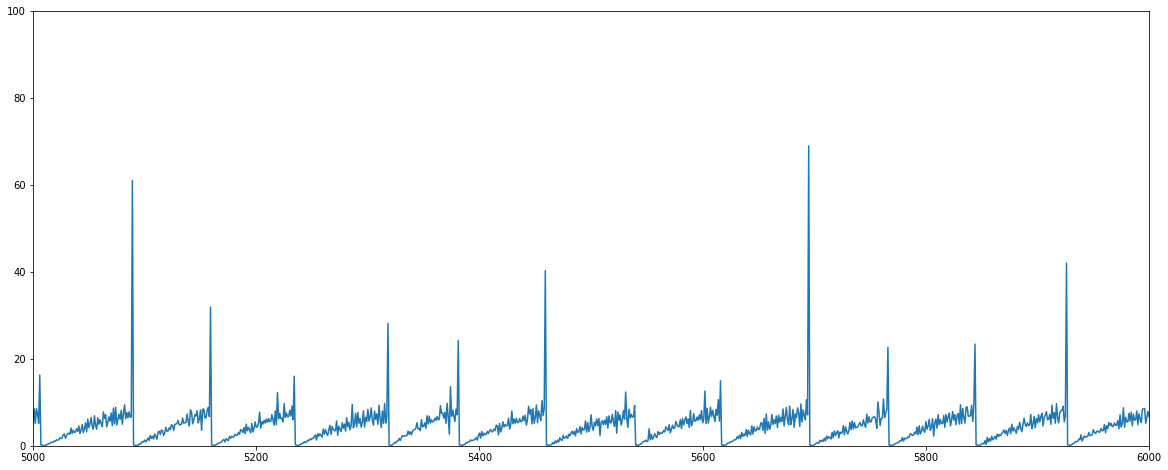

In [29]:
vels=plot_vel("states_04.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
plt.xlim(left=5000,right=6000)
plt.ylim(bottom=0,top=100)

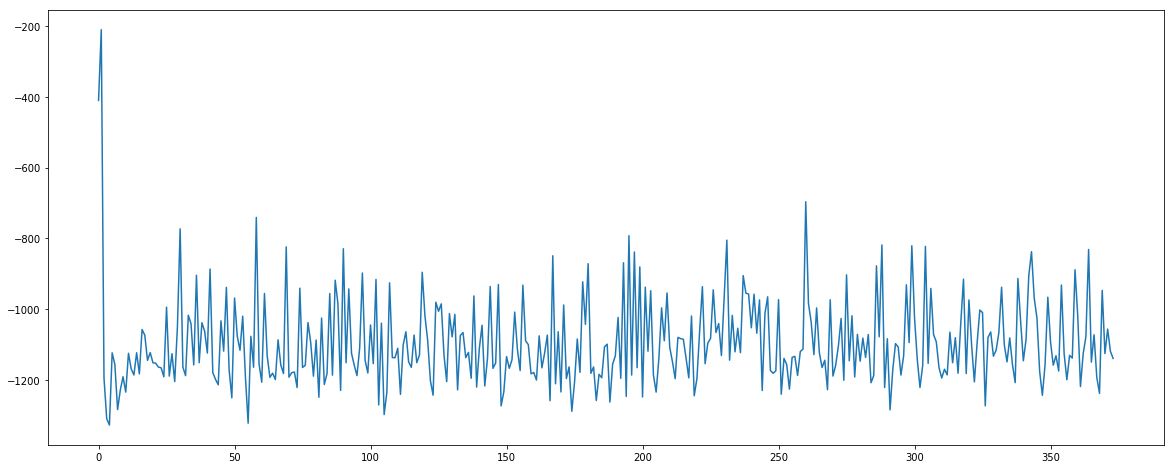

In [8]:
plot_rewards("rewards_04.txt")

* 两层Dropout，都改成0.3

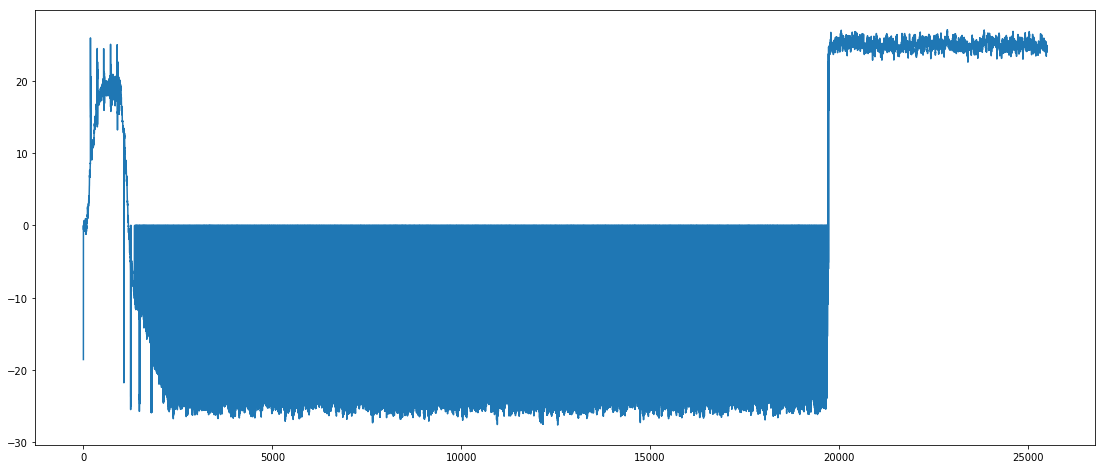

In [24]:
action_values=plot_behaviers("actions_05.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)
#plt.xlim(left=-200,right=20000)

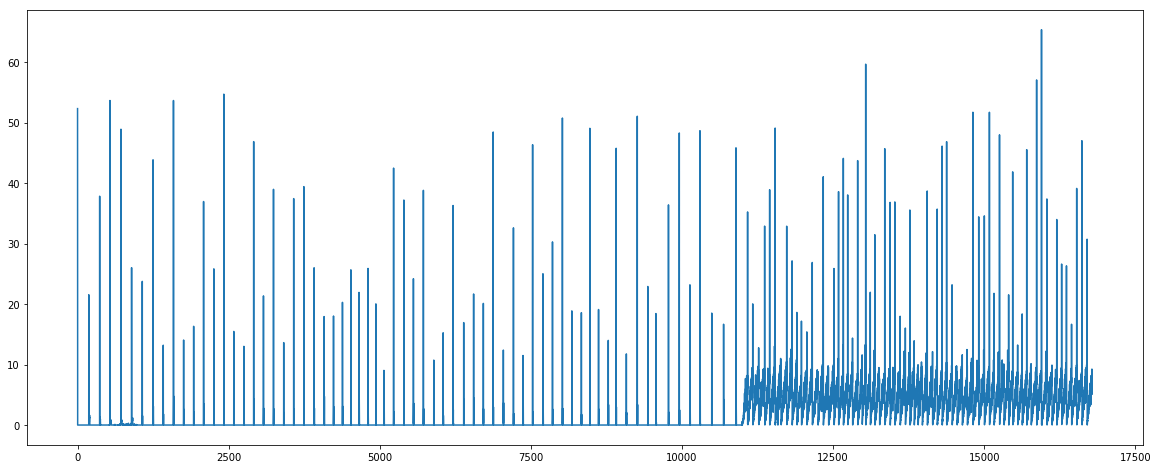

In [36]:
vels=plot_vel("states_05.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=20000,right=25000)
#plt.ylim(bottom=-10,top=100)

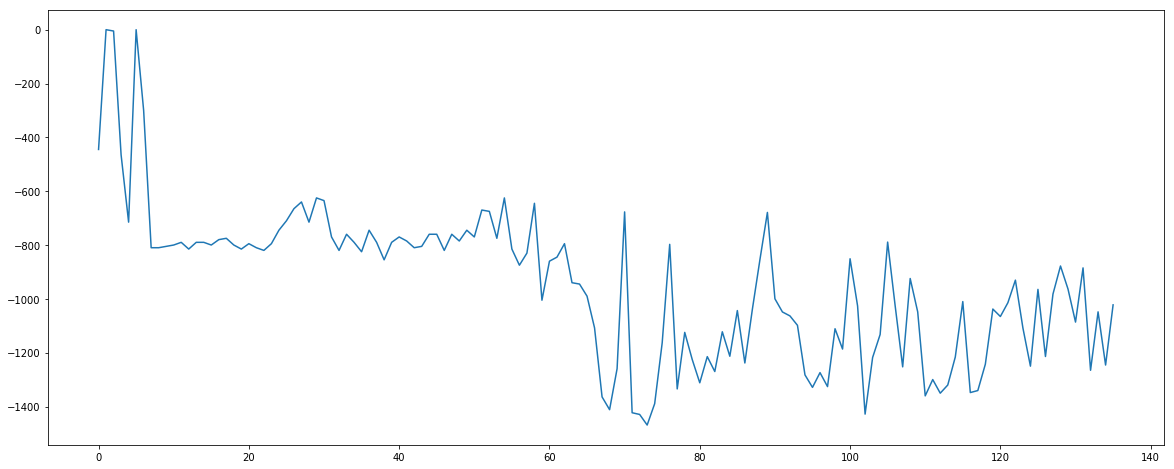

In [26]:
plot_rewards("rewards_05.txt")

* hidden layer 尺寸减小：300-200
* 第二层加Dropout：0.3

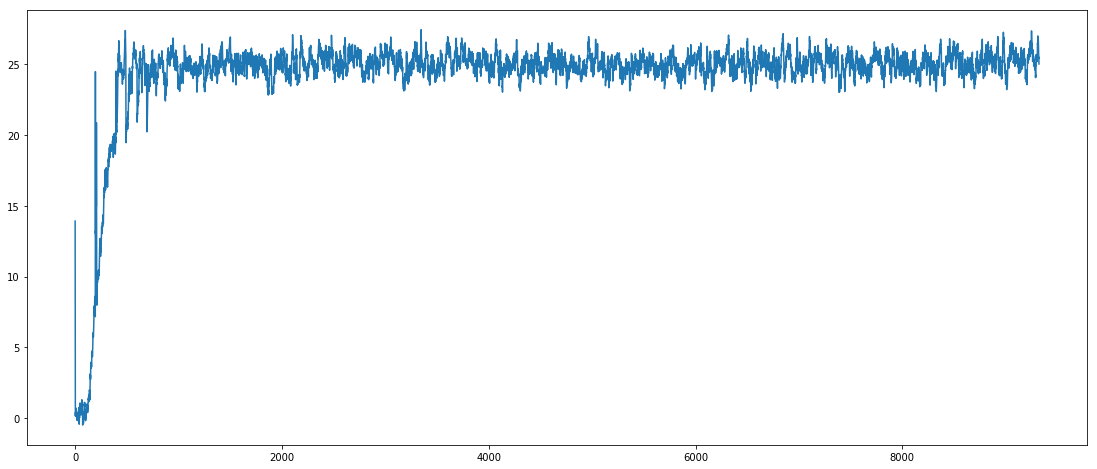

In [37]:
action_values=plot_behaviers("actions_06.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

(0, 50)

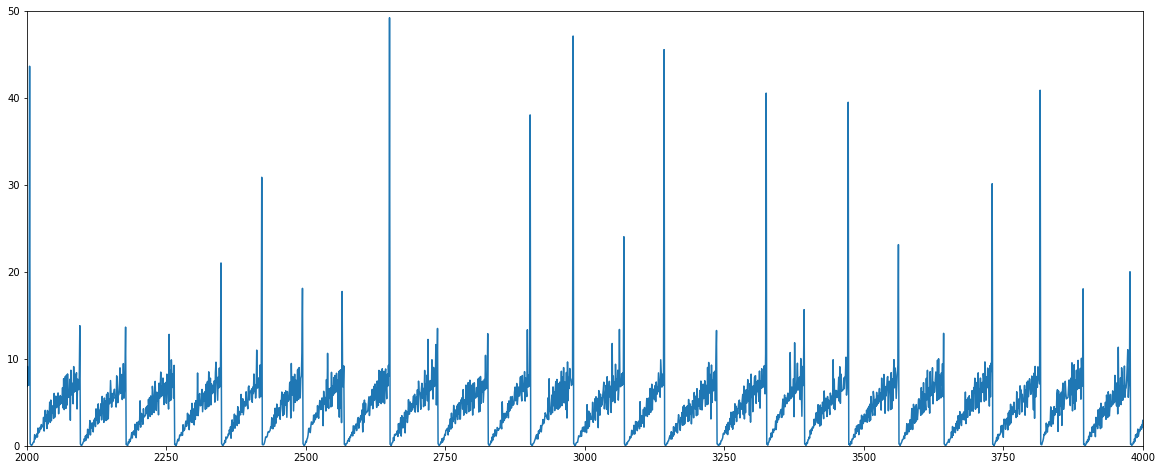

In [43]:
vels=plot_vel("states_06.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
plt.xlim(left=2000,right=4000)
plt.ylim(bottom=0,top=50)

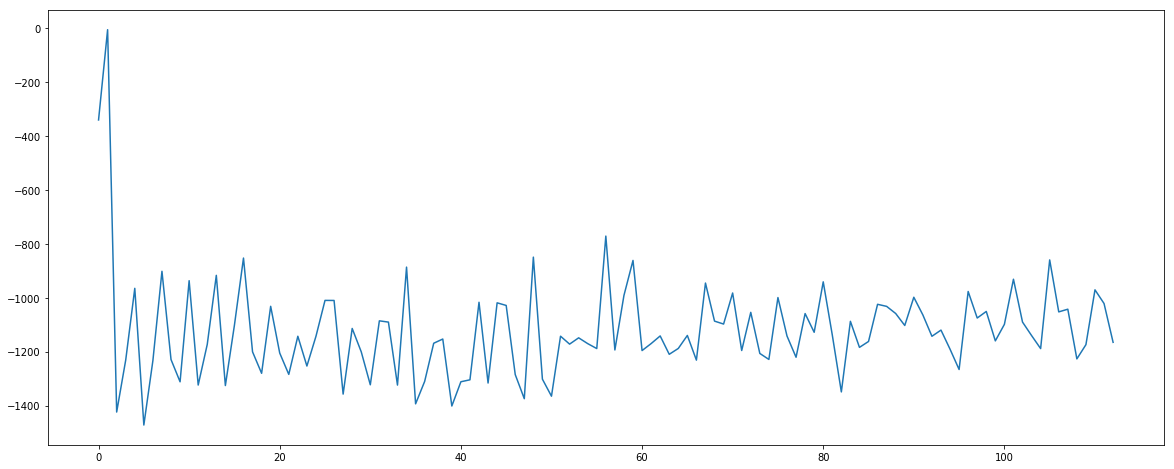

In [39]:
plot_rewards("rewards_06.txt")

* 奖励函数加上速度惩罚：速度超过10，reward -10

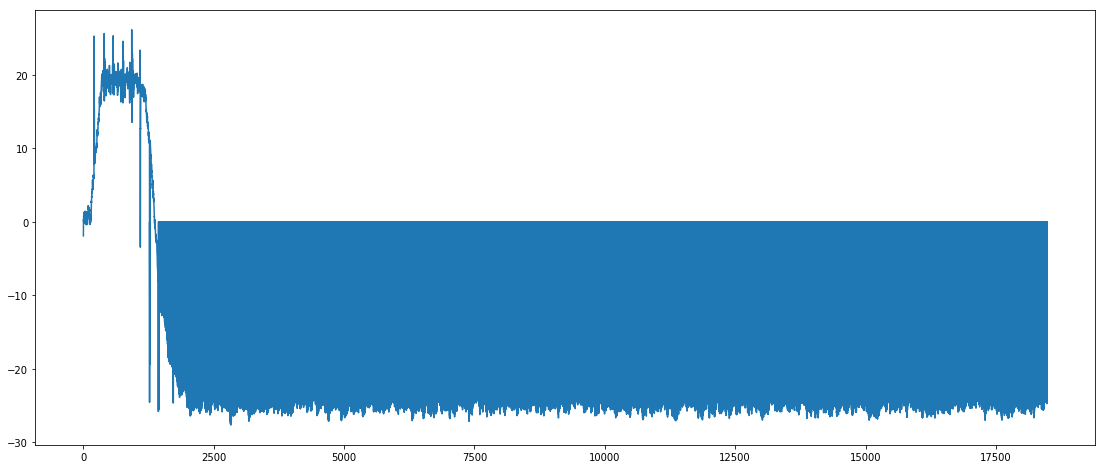

In [44]:
action_values=plot_behaviers("actions_07.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

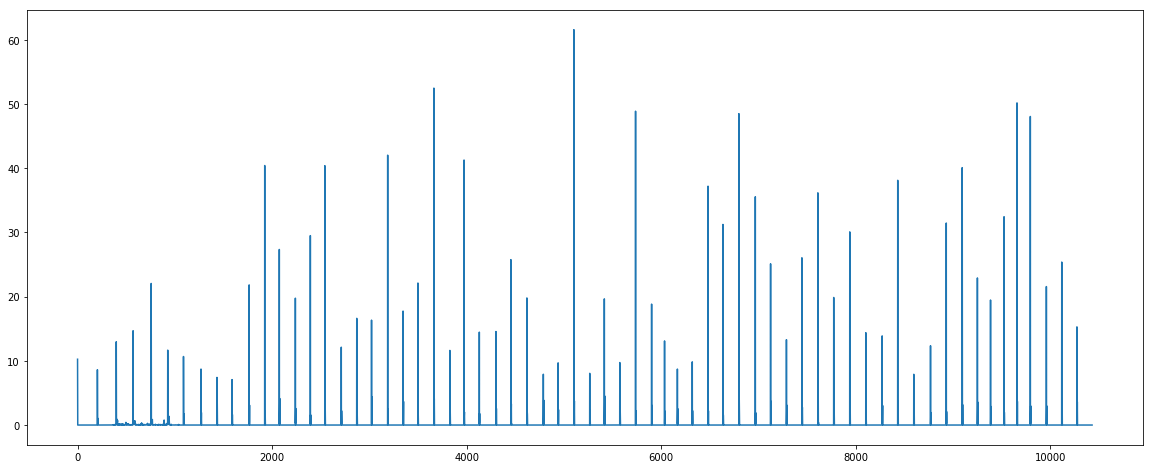

In [46]:
vels=plot_vel("states_07.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=2000,right=4000)
#plt.ylim(bottom=0,top=50)

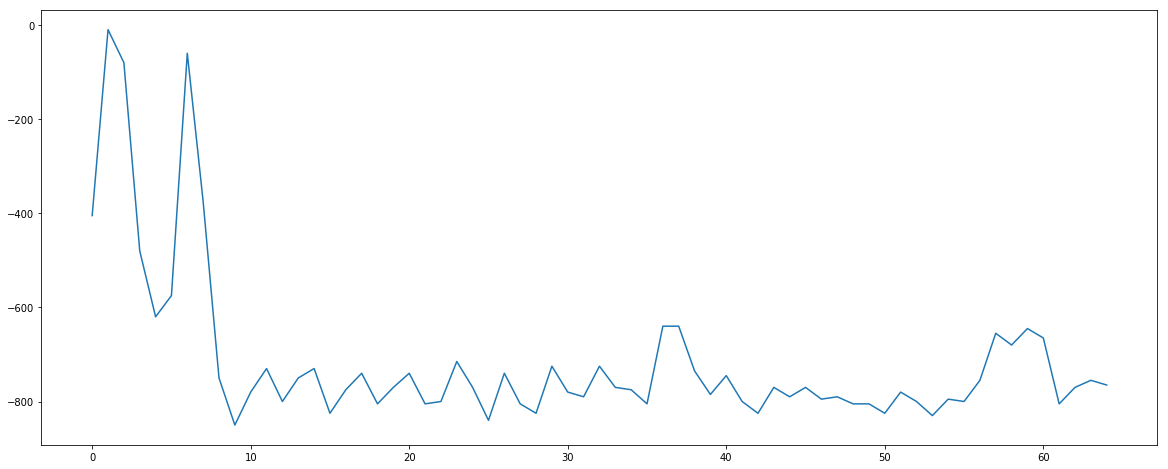

In [47]:
plot_rewards("rewards_07.txt")

* 奖励函数增加速度控制：
   * 超高目标高度后，速度为负，给正奖励

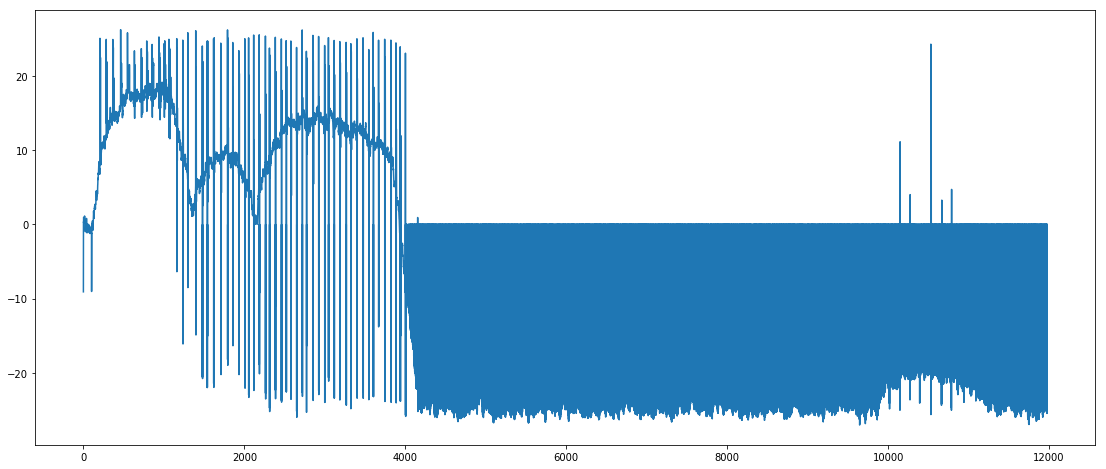

In [48]:
action_values=plot_behaviers("actions_08.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

(-20, 50)

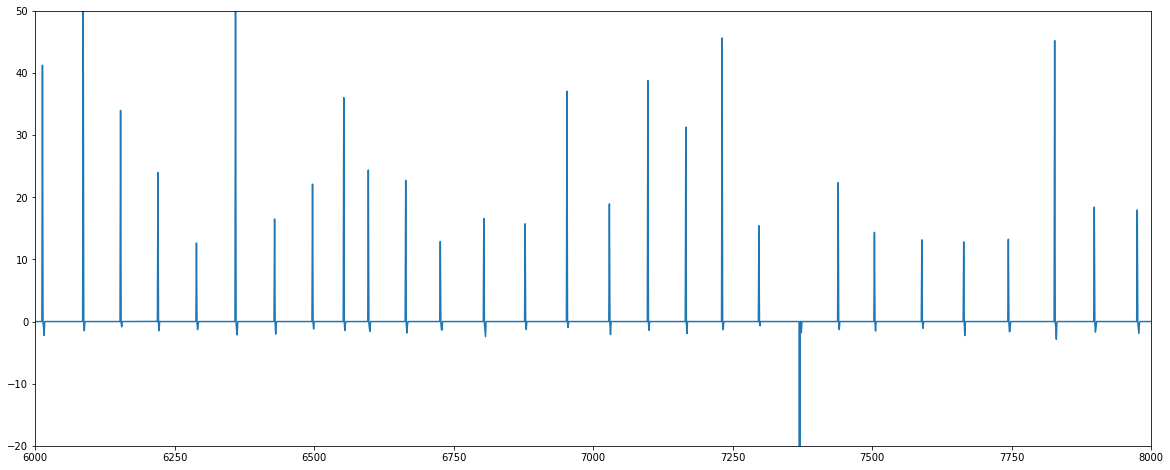

In [52]:
vels=plot_vel("states_08.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
plt.xlim(left=6000,right=8000)
plt.ylim(bottom=-20,top=50)

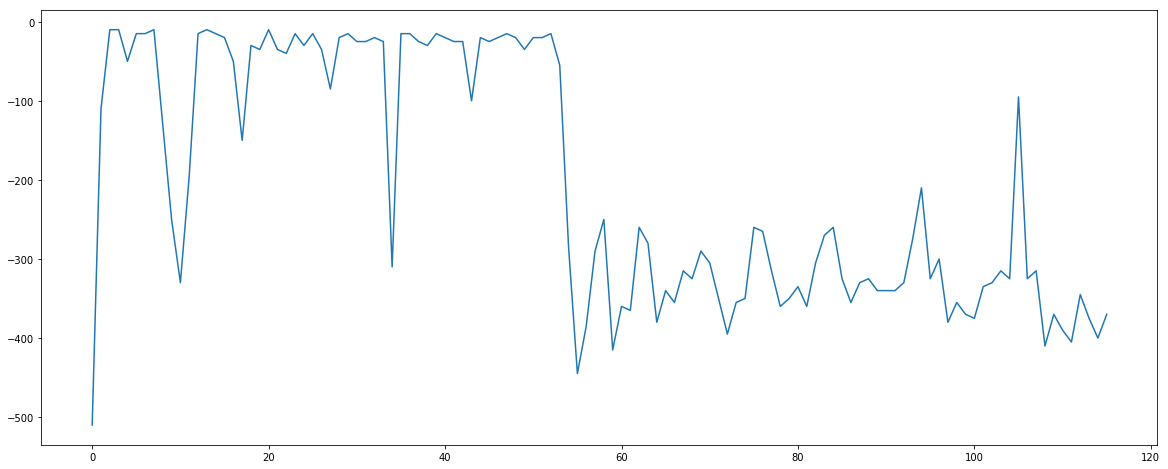

In [50]:
plot_rewards("rewards_08.txt")

速度惩罚
```
        """速度惩罚"""
        if abs(self.velocity)>10:
            reward-=10
        if pose.position.z < self.target_z/2:
            if self.velocity <=0.0:
                reward-=10

```

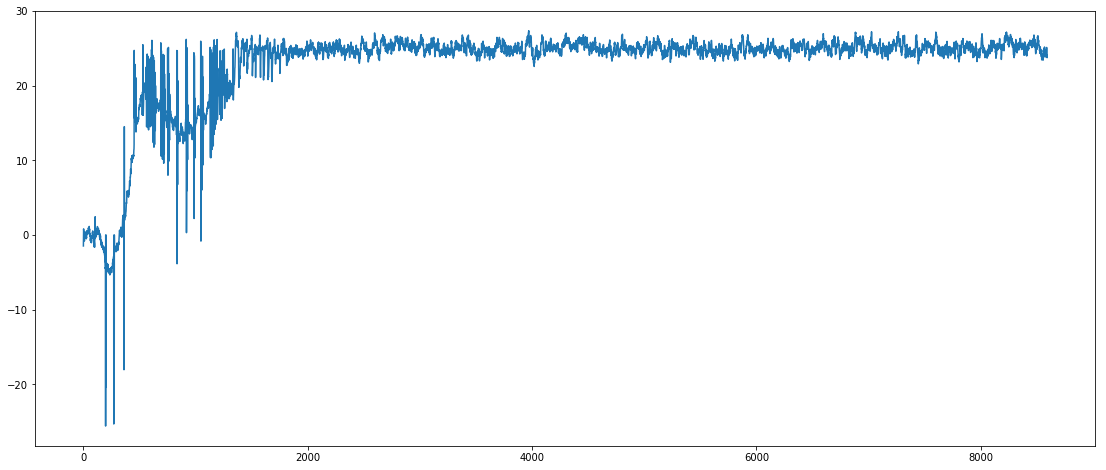

In [53]:
action_values=plot_behaviers("actions_09.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

(-20, 50)

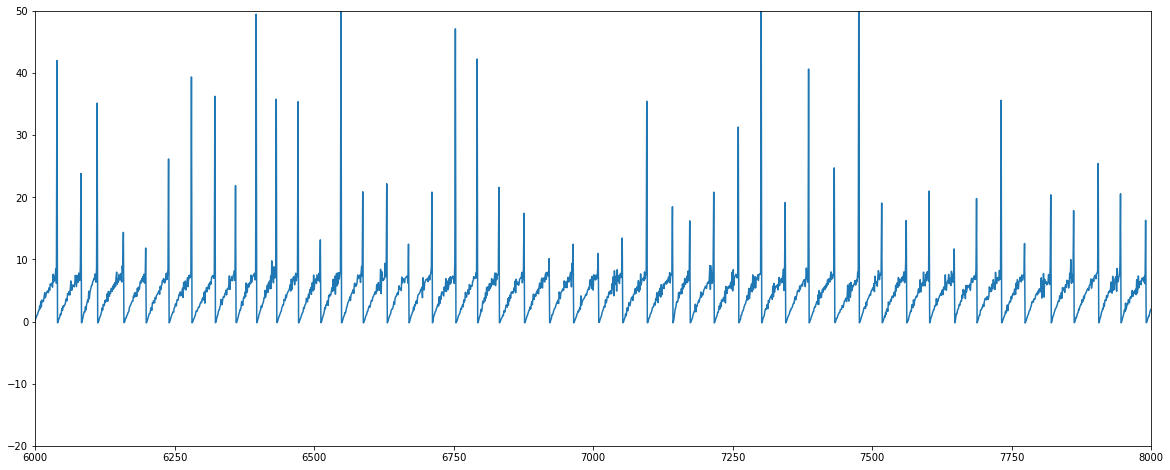

In [54]:
vels=plot_vel("states_09.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
plt.xlim(left=6000,right=8000)
plt.ylim(bottom=-20,top=50)

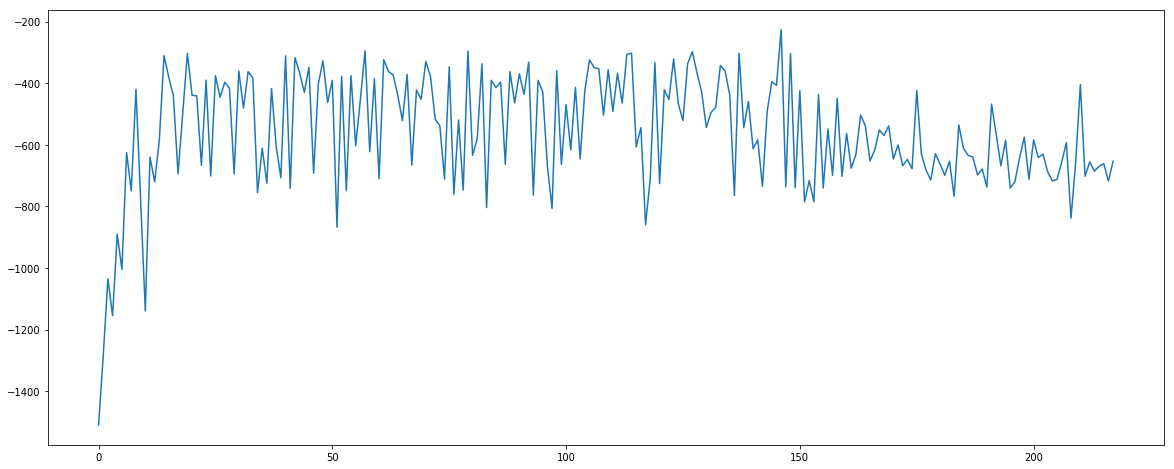

In [55]:
plot_rewards("rewards_09.txt")

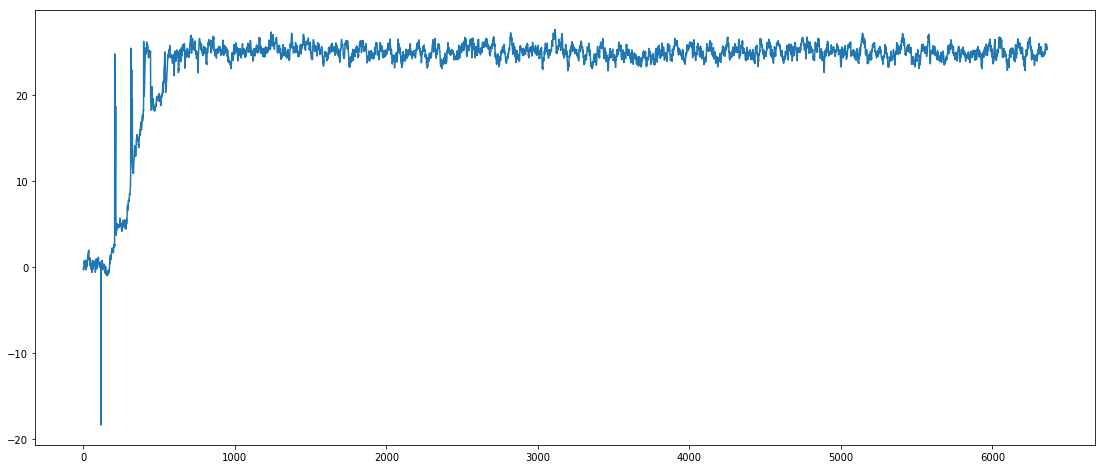

In [57]:
action_values=plot_behaviers("actions_10.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

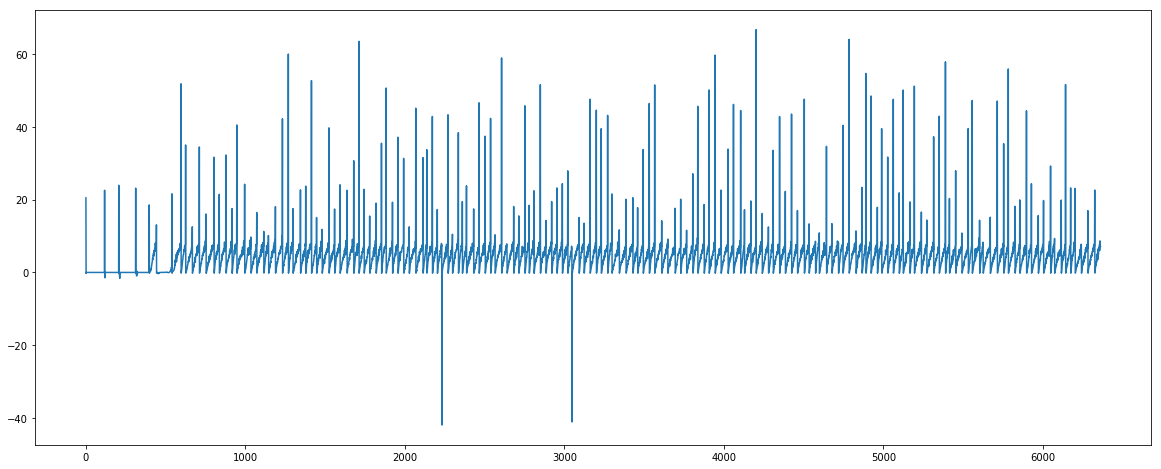

In [59]:
vels=plot_vel("states_10.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
#plt.ylim(bottom=-20,top=50)

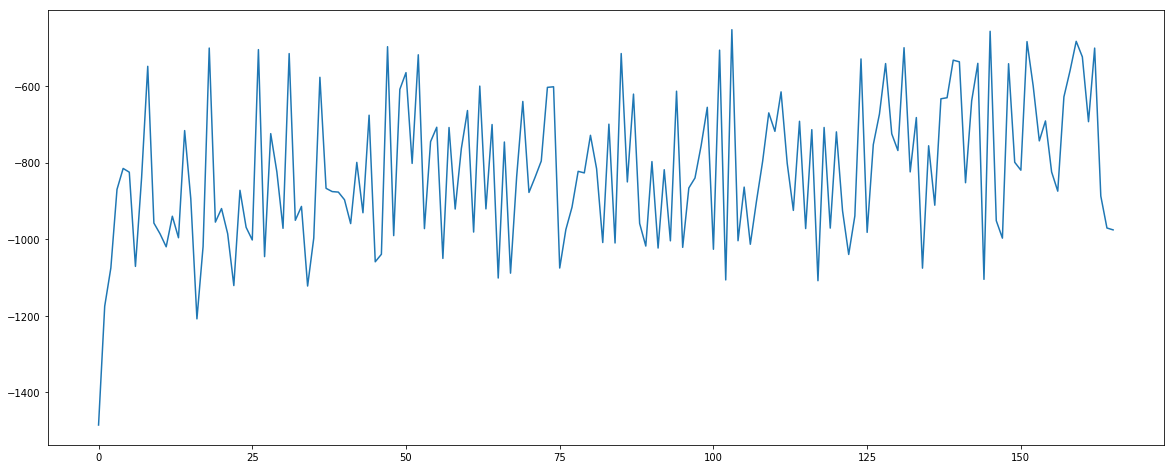

In [56]:
plot_rewards("rewards_10.txt")

```
 
        """速度惩罚"""
        if abs(self.velocity)>10:
            reward-=100
        if pose.position.z < self.target_z/2:
            if self.velocity <=0.0:
                reward-=30

        if pose.position.z < self.target_z:
            """飞行方向惩罚"""
            if pose.orientation.z!=0.0:
                punish=(pose.orientation.z/abs(pose.orientation.z))*5
                reward+=min(0,punish) 
        elif pose.position.z > self.target_z:
            """高度偏离惩罚"""
            reward+=-abs(self.target_z-pose.position.z)*10
            if self.velocity < 0:
                reward+=30
            elif self.velocity > 0:
                reward-=30
           
        
        """高度目标奖励,速度目标奖励（0.0)"""
        if timestamp > 1: 
            if abs(pose.position.z-self.target_z) < 0.3:
                self.target_hit+=1
                reward+=10*(self.target_hit)**2
                if self.velocity==0.0:
                    reward+=100
```

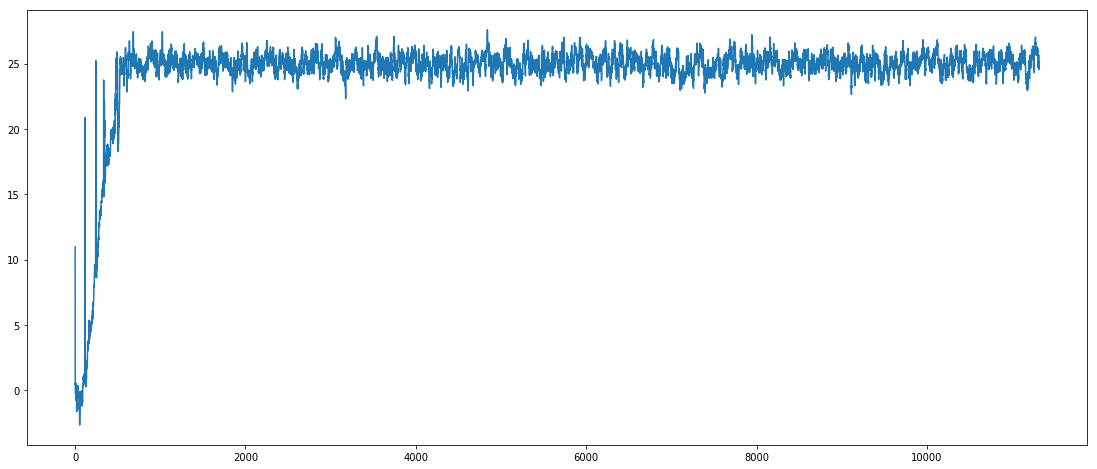

In [4]:
action_values=plot_behaviers("actions_11.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

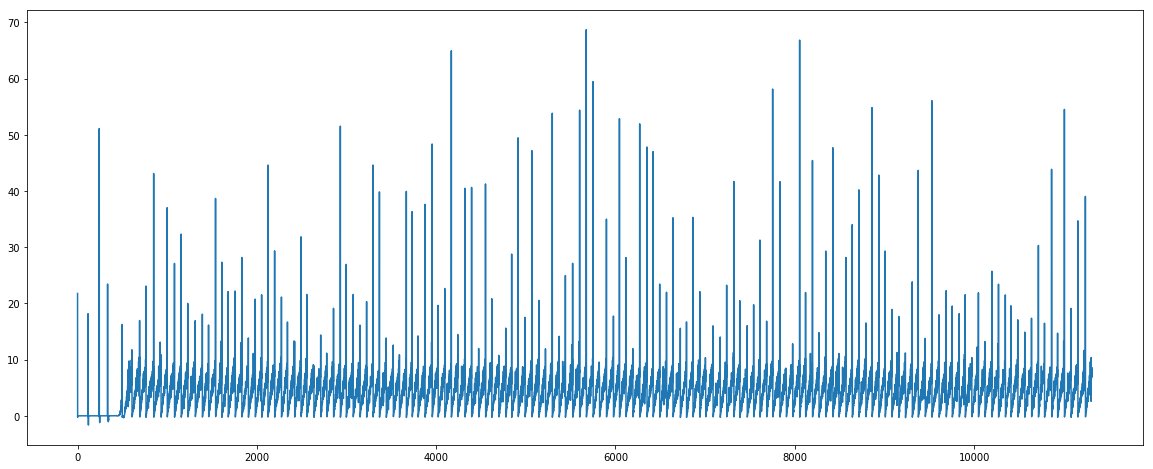

In [9]:
vels=plot_vel("states_11.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
#plt.ylim(bottom=-20,top=50)

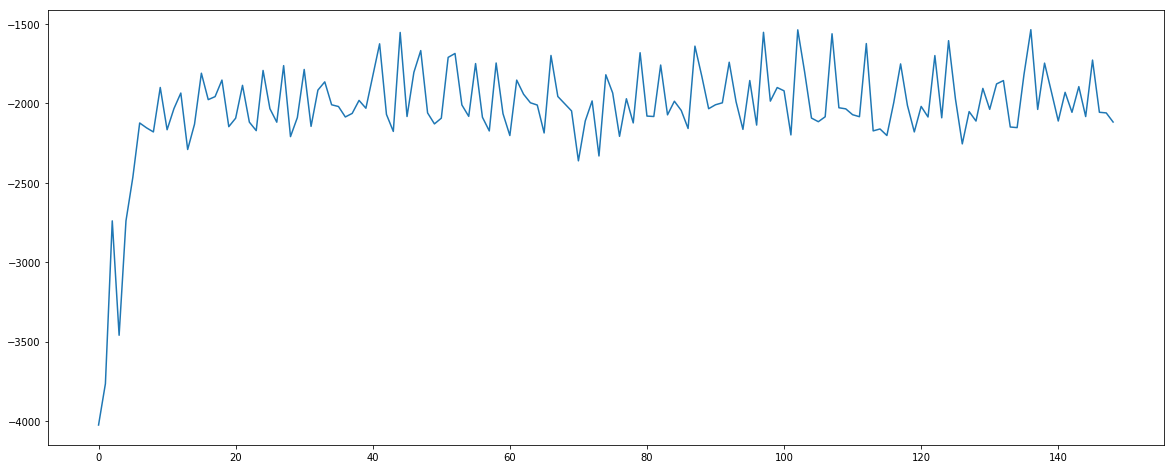

In [10]:
plot_rewards("rewards_11.txt")